# Preprocessing data in MNE-Python

`
Authors:
Britta Westner, Alexandre Gramfort, Denis A. Engemann
`

## Setup

We start out with loading the packages we need. These include `matplotlib` for plotting, `os` for path management, `numpy` for numerical computations, and of course `mne`.
We also use matplotlib magic to ask for figure to be plotted inline. 

In [4]:
%matplotlib inline 
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mne

Let's double check your MNE-Python version. This should give back 1.2.2

In [5]:
mne.__version__

'1.2.2'

We set the log-level of MNE-Python to 'warning' so the output is less verbose:

In [6]:
mne.set_log_level('warning')

### Help!

Remember, if you need help just ask ... the machine!
Let's see how to get the docstring information for a function - here, the function `pick_types`.

In [7]:
mne.pick_types?

Signature:
mne.pick_types(
    info,
    meg=False,
    eeg=False,
    stim=False,
    eog=False,
    ecg=False,
    emg=False,
    ref_meg='auto',
    *,
    misc=False,
    resp=False,
    chpi=False,
    exci=False,
    ias=False,
    syst=False,
    seeg=False,
    dipole=False,
    gof=False,
    bio=False,
    ecog=False,
    fnirs=False,
    csd=False,
    dbs=False,
    temperature=False,
    gsr=False,
    include=(),
    exclude='bads',
    selection=None,
)
Docstring:
Pick channels by type and names.

Parameters
----------

info : mne.Info
    The :class:`mne.Info` object with information about the sensors and methods of measurement.

meg : bool | str
    If True include MEG channels. If string it can be 'mag', 'grad',
    'planar1' or 'planar2' to select only magnetometers, all
    gradiometers, or a specific type of gradiometer.
eeg : bool
    If True include EEG channels.
stim : bool
    If True include stimulus channels.
eog : bool
    If True include EOG channels.
ecg :

## Set the path to the data

You should have downloaded the `ds000117-practical` folder. We have to let Python know, where to find this folder on your disk. You will have to adjust the path below to reflect your computer and path structure!
You can print the whole path and check the directory to double check it's correct.

In [8]:
# Change the following path to where the folder ds000117 is on your disk
data_path = os.path.expanduser("~/Documents/teaching/practical_meeg_2022_data/ds000117")

raw_fname = os.path.join(data_path,
    'derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif')

In [9]:
print(raw_fname)

/Users/brittawe/Documents/teaching/practical_meeg_2022_data/ds000117/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif


Use `bash` to verify the path is really there - if this gives an error, chances are you made a typo in the path!

In [10]:
ls $raw_fname

/Users/brittawe/Documents/teaching/practical_meeg_2022_data/ds000117/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif@


## Access and read the raw data

In [11]:
mne.io.read_raw_fif?

Signature:
mne.io.read_raw_fif(
    fname,
    allow_maxshield=False,
    preload=False,
    on_split_missing='raise',
    verbose=None,
)
Docstring:
Reader function for Raw FIF data.

Parameters
----------
fname : str | file-like
    The raw filename to load. For files that have automatically been split,
    the split part will be automatically loaded. Filenames should end
    with raw.fif, raw.fif.gz, raw_sss.fif, raw_sss.fif.gz, raw_tsss.fif,
    raw_tsss.fif.gz, or _meg.fif. If a file-like object is provided,
    preloading must be used.

    .. versionchanged:: 0.18
       Support for file-like objects.
allow_maxshield : bool | str (default False)
    If True, allow loading of data that has been recorded with internal
    active compensation (MaxShield). Data recorded with MaxShield should
    generally not be loaded directly, but should first be processed using
    SSS/tSSS to remove the compensation signals that may also affect brain
    activity. Can also be "yes" to load witho

In [12]:
raw = mne.io.read_raw_fif(raw_fname, preload=False)
print(raw)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 540100 (491.0 s), ~7.0 MB, data not loaded>


In [13]:
raw

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 540100 (491.0 s), ~7.0 MB, data not loaded>

For general info on importing data you can check:
- for MEG: https://mne.tools/stable/auto_tutorials/io/plot_10_reading_meg_data.html
- for EEG: https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html

## Understand your data file


Now let's look at the measurement info. It can give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.

In [14]:
print(raw.info)

<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 74 EEG, 3 Stimulus, 12 misc, 9 CHPI
 custom_ref_applied: False
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 356.4 Hz
 meas_date: 1941-03-22 11:04:14 UTC
 meas_id: 4 items (dict)
 nchan: 404
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: dgw_studies
 projs: []
 sfreq: 1100.0 Hz
 subject_info: 2 items (dict)
>


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>How many channels do you have for each type of sensors?</li>
    <li>What is the sampling frequency?</li>
    <li>Have the data been filtered?</li>
    <li>What is the frequency of the line noise?</li>
    <li>Is there any bad channel?</li>
    </ul>
</div>

## A closer look at the info dictionary

raw.info is just a dictionary:

In [15]:
isinstance(raw.info, dict)

True

So we can access its elements this way:

In [16]:
raw.info['sfreq']  # Sampling frequency

1100.0

In [17]:
raw.info['bads']  # list of marked bad channels

[]

In [18]:
raw.info['line_freq']

50.0

## A closer look at the channels
Next let's see what channels are present. It is available via the `raw.ch_names` attribute.

In [19]:
type(raw.ch_names)

list

In [20]:
raw.ch_names[:10]  # this prints the first ten channels

['MEG0113',
 'MEG0112',
 'MEG0111',
 'MEG0122',
 'MEG0123',
 'MEG0121',
 'MEG0132',
 'MEG0133',
 'MEG0131',
 'MEG0143']

You can index it as a list

In [21]:
raw.ch_names[42]

'MEG0432'

We can also query the channel type of a specific channel:

In [22]:
channel_type = mne.io.pick.channel_type(raw.info, 75)
print('Channel #75 is of type:', channel_type)  # print this out in a neat way

channel_type = mne.io.pick.channel_type(raw.info, 320)
print('Channel #320 is of type:', channel_type)

Channel #75 is of type: grad
Channel #320 is of type: eeg


The info also contains all the details about the sensors (type, locations, coordinate frame etc.) in `chs`:

In [23]:
len(raw.info['chs'])

404

In [24]:
type(raw.info['chs'])

list

In [25]:
raw.info['chs'][0]  # check the first channel

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 1.9073486328125e-05,
 'cal': 3.250000046861601e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.01532829,  0.00619847,
        -0.99986327, -0.18597366, -0.98255992, -0.00331254, -0.98243302,
         0.185894  ,  0.016216  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [26]:
raw.info['chs'][330]

{'scanno': 331,
 'logno': 25,
 'kind': 2 (FIFFV_EEG_CH),
 'range': 0.00030517578125,
 'cal': 0.00019999999494757503,
 'coil_type': 1 (FIFFV_COIL_EEG),
 'loc': array([ 5.63842431e-02,  3.68367434e-02,  9.40217227e-02,  8.26010015e-04,
         1.14762366e-01, -2.10680366e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]),
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'EEG025',
 'coord_frame': 4 (FIFFV_COORD_HEAD)}

Now that we know that there is EEG and MEG channels in the data, we can plot both separately:

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/2013439534.py:1: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  raw.plot_sensors(kind='topomap', ch_type='grad');


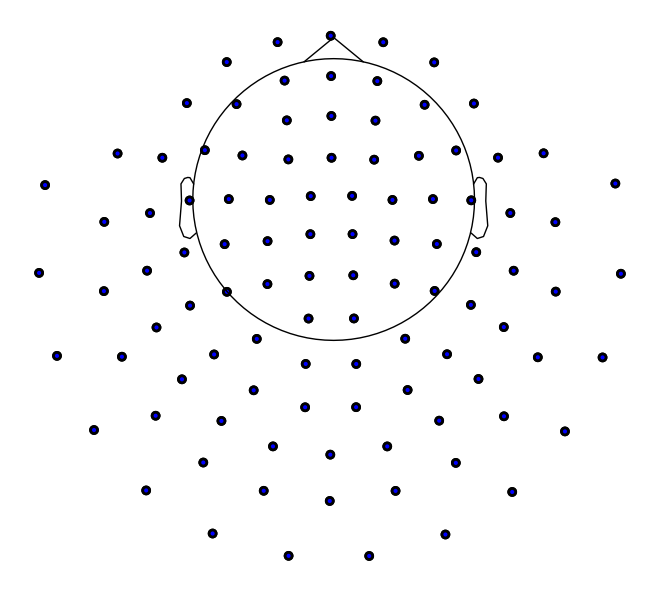

In [27]:
raw.plot_sensors(kind='topomap', ch_type='grad');

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/265059241.py:1: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  raw.plot_sensors(kind='topomap', ch_type='eeg');


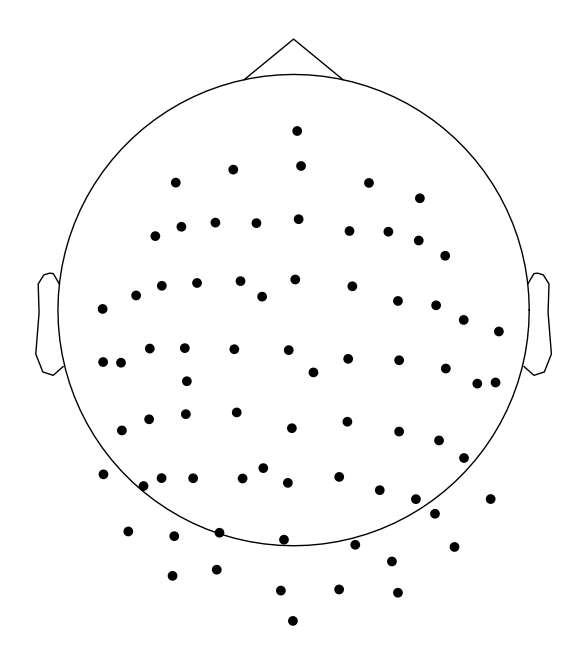

In [28]:
raw.plot_sensors(kind='topomap', ch_type='eeg');

## Setting channel types and re-referencing

Some channels are wrongly defined as EEG in the file. 
Two of these are EOG (EEG061 and EEG062) and EEG063 is actually an ECG channel. EEG064 was recording but not connected to anything, so we'll make it `'misc'` instead. 
We will now set the channel types for those wrongly classified channels. This will be useful for automatic artifact rejection.

In [29]:
raw.set_channel_types?

Signature: raw.set_channel_types(mapping, verbose=None)
Docstring:
Define the sensor type of channels.

Parameters
----------
mapping : dict
    A dictionary mapping a channel to a sensor type (str), e.g.,
    ``{'EEG061': 'eog'}``.

verbose : bool | str | int | None
    Control verbosity of the logging output. If ``None``, use the default
    verbosity level. See the :ref:`logging documentation <tut-logging>` and
    :func:`mne.verbose` for details. Should only be passed as a keyword
    argument.

Returns
-------
inst : instance of Raw | Epochs | Evoked
    The instance (modified in place).

    .. versionchanged:: 0.20
       Return the instance.

Notes
-----
The following sensor types are accepted:

    ecg, eeg, emg, eog, exci, ias, misc, resp, seeg, dbs, stim, syst,
    ecog, hbo, hbr, fnirs_cw_amplitude, fnirs_fd_ac_amplitude,
    fnirs_fd_phase, fnirs_od, temperature, gsr

.. versionadded:: 0.9.0
File:      ~/miniforge3/envs/mne_aix/lib/python3.10/site-packages/mne/channels/cha

In [30]:
raw.set_channel_types({'EEG061': 'eog',  # actually EOG not EEG
                       'EEG062': 'eog',  # actually EOG not EEG
                       'EEG063': 'ecg',  # actually ECG not EEG
                       'EEG064': 'misc'})  # EEG064 free-floating electrode

# we also rename the EOG and ECG channels:
raw.rename_channels({'EEG061': 'EOG061',
                     'EEG062': 'EOG062',
                     'EEG063': 'ECG063'})

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 540100 (491.0 s), ~7.0 MB, data not loaded>

In [31]:
raw.info

<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 70 EEG, 2 EOG, 1 ECG, 13 misc, 3 Stimulus, 9 CHPI
 custom_ref_applied: False
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 356.4 Hz
 meas_date: 1941-03-22 11:04:14 UTC
 meas_id: 4 items (dict)
 nchan: 404
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: dgw_studies
 projs: []
 sfreq: 1100.0 Hz
 subject_info: 2 items (dict)
>

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/265059241.py:1: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  raw.plot_sensors(kind='topomap', ch_type='eeg');


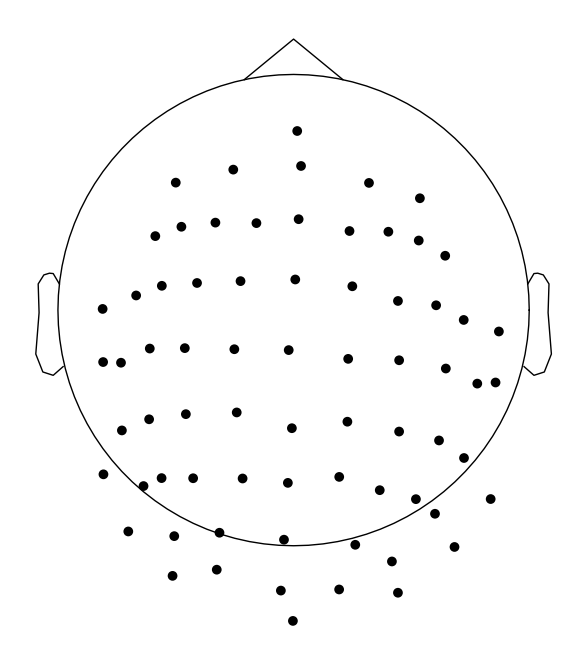

In [32]:
raw.plot_sensors(kind='topomap', ch_type='eeg');

After we have fixed the channels, we can now compute an average reference for the EEG. 

In [33]:
# For setting the reference, we have to load the data into memory:
raw.load_data()
print(raw.info['custom_ref_applied'])  # let's see if there is a reference applied

0 (FIFFV_MNE_CUSTOM_REF_OFF)


In [34]:
# now let's re-reference
raw.set_eeg_reference(ref_channels='average', projection=False)
print(raw.info['projs'])  # not added as a projection
print(raw.info['custom_ref_applied'])

[]
1 (FIFFV_MNE_CUSTOM_REF_ON)


## Accessing the data

To access the data just use the `[]` syntax as to access any element of a list, dict etc. Note that `raw[]` returns two things: the data and the times array.

In [35]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(404, 10)
(10,)


In [36]:
times  # always starts at 0 by convention

array([0.        , 0.00090909, 0.00181818, 0.00272727, 0.00363636,
       0.00454545, 0.00545455, 0.00636364, 0.00727273, 0.00818182])

Note that `raw[]` returns both the data and the times array.

## Resampling the data

We will now change the sampling frequency of the data to speed up the computations.

In [37]:
raw.load_data()  # load data into memory
raw.resample(300)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 147300 (491.0 s), ~461.0 MB, data loaded>

And let's remove unecessary channels - some empty stimulus channels, misc. channels, and HPI channels.

In [38]:
raw.drop_channels?

Signature: raw.drop_channels(ch_names, on_missing='raise')
Docstring:
Drop channel(s).

Parameters
----------
ch_names : iterable or str
    Iterable (e.g. list) of channel name(s) or channel name to remove.

on_missing : 'raise' | 'warn' | 'ignore'
    Can be ``'raise'`` (default) to raise an error, ``'warn'`` to emit a
    warning, or ``'ignore'`` to ignore when entries in ch_names are not present in the raw instance.

    .. versionadded:: 0.23.0

Returns
-------
inst : instance of Raw, Epochs, or Evoked
    The modified instance.

See Also
--------
reorder_channels
pick_channels
pick_types

Notes
-----
.. versionadded:: 0.9.0
File:      ~/miniforge3/envs/mne_aix/lib/python3.10/site-packages/mne/channels/channels.py
Type:      method


In [39]:
to_drop = ['STI201', 'STI301', 'MISC201', 'MISC202', 'MISC203',
           'MISC204', 'MISC205', 'MISC206', 'MISC301', 'MISC302',
           'MISC303', 'MISC304', 'MISC305', 'MISC306', 'CHPI001',
           'CHPI002', 'CHPI003', 'CHPI004', 'CHPI005', 'CHPI006',
           'CHPI007', 'CHPI008', 'CHPI009']

In [40]:
raw.drop_channels(to_drop)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 381 x 147300 (491.0 s), ~435.2 MB, data loaded>

## Filtering the data and plotting raw data

We want to filter the data between 0 and 40 Hz using a linear-phase finite-impulse response (FIR) filter.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Which parameters do we have to set to achieve this, based on the docstring of the `filter` method?</li>
    </ul>
</div>


In [41]:
raw.filter?

Signature:
raw.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=None,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types, channel *name

To see what effect filtering has for our data, let's quickly look at our data first! For full functionality, we ask matplotlib to show the plot in a separate window.

In [42]:
%matplotlib qt
raw.plot()

In [43]:
raw.filter(0, 40)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 381 x 147300 (491.0 s), ~435.2 MB, data loaded>

Now that we filtered our data, let's look at it again. Can you spot the difference?

In [44]:
raw.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li> Which data changed more due to the filtering: EEG or MEG?</li>
      <li> Can you find reasons why?</li>
      <li>  Do you see any bad channels?</li>
      <li>  Is there any characteristics you can see in the data?</li>
       </ul>
</div>

For more information on visualizing of raw data, see here: 
https://mne.tools/0.16/auto_tutorials/plot_visualize_raw.html


## Look at the event structure of the data

The data has different events, which mark which stimulus was shown to the participants. The event/trigger structure is as follows:
- 5, 6, 7: famous faces
- 13, 14, 15: unfamiliar faces
- 17, 18, 19: scrambled faces

We first look at which events are there:

In [45]:
events = mne.find_events(raw, stim_channel='STI101', verbose=True)

259 events found
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115 4352]


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>What is the type of the variable events?</li>
    <li>What is the meaning of the 3 columns of events?</li>
    <li>How many events of the value 5 are there?
    </ul>
</div>

 

There was a time offset of 34.5 ms in the stimulus presentation. We need to correct the events accordingly.

In [46]:
delay = int(round(0.0345 * raw.info['sfreq']))
events[:, 0] = events[:, 0] + delay

Let's visualize the paradigm:

In [47]:
events = events[events[:, 2] < 20]  # take only events with code less than 20

In [48]:
fig = mne.viz.plot_events(events, raw.info['sfreq']);

For event trigger and conditions we use a Python dictionary with keys that contain "/" for grouping sub-conditions

In [49]:
event_id = {
    'face/famous/first': 5,
    'face/famous/immediate': 6,
    'face/famous/long': 7,
    'face/unfamiliar/first': 13,
    'face/unfamiliar/immediate': 14,
    'face/unfamiliar/long': 15,
    'scrambled/first': 17,
    'scrambled/immediate': 18,
    'scrambled/long': 19,
}

In [50]:
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          event_id=event_id);

We can now re-visit our raw data plot:

In [51]:
raw.plot(event_id=event_id, events=events);

## Epoch data and artifact rejection

Define epochs parameters:

In [52]:
tmin = -0.5  # start of each epoch (500ms before the trigger)
tmax = 2.0  # end of each epoch (2000ms after the trigger)

Define the baseline period:

In [53]:
baseline = (-0.2, 0)  # means from 200ms before to stim onset (t = 0)

We also pick channels now - MEG, EEG and EOG channels

In [54]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True,
                       stim=False, exclude='bads')

The easiest (and maybe also most dangerous?) way to clean your data is to define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers and EOG.

<div class="alert alert-info">
    <b>REMARK</b>:
     <ul>
    <li>The <a href="https://autoreject.github.io/">autoreject project</a> aims to solve this problem of reject parameter setting. See the <a href="https://www.sciencedirect.com/science/article/pii/S1053811917305013">paper</a> for more info.</li>
    </ul>
</div>

In [55]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

Now we can put all of this together and create epochs:

In [56]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline,
                    reject=reject)

In [57]:
print(epochs)  # let's look at some details about the epochs object

<Epochs |  146 events (good & bad), -0.5 - 2 sec, baseline -0.2 – 0 sec, ~7.0 MB, data not loaded,
 'face/famous/first': 25
 'face/famous/immediate': 10
 'face/famous/long': 14
 'face/unfamiliar/first': 25
 'face/unfamiliar/immediate': 12
 'face/unfamiliar/long': 10
 'scrambled/first': 25
 'scrambled/immediate': 14
 'scrambled/long': 11>


Let's explicitly drop the epochs we identified as _bad_ through the thresholds we identified above:

In [58]:
epochs.drop_bad()  # remove bad epochs based on reject

Number of events,79
Events,face/famous/first: 13face/famous/immediate: 3face/famous/long: 6face/unfamiliar/first: 17face/unfamiliar/immediate: 4face/unfamiliar/long: 6scrambled/first: 15scrambled/immediate: 9scrambled/long: 6
Time range,-0.500 – 2.000 sec
Baseline,-0.200 – 0.000 sec


In [59]:
epochs.load_data()  # load data in memory

Number of events,79
Events,face/famous/first: 13face/famous/immediate: 3face/famous/long: 6face/unfamiliar/first: 17face/unfamiliar/immediate: 4face/unfamiliar/long: 6scrambled/first: 15scrambled/immediate: 9scrambled/long: 6
Time range,-0.500 – 2.000 sec
Baseline,-0.200 – 0.000 sec


## A closer look at artifact rejection


First, let's have a closer look at the methods of the epochs object.
Uncomment the line below and hit ``epochs.<TAB>``

In [60]:
#epochs.

See how epochs were dropped

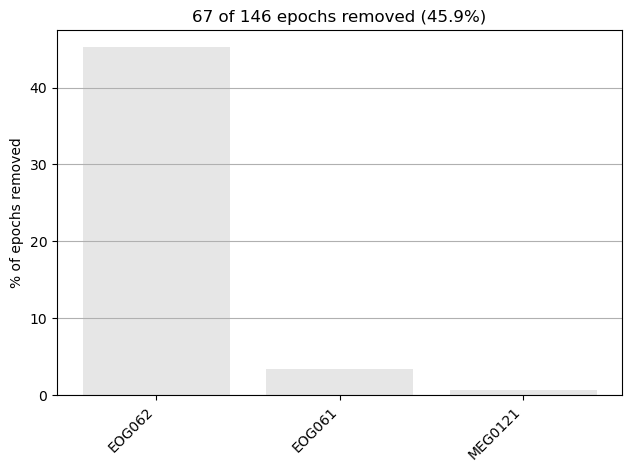

In [61]:
%matplotlib inline
epochs.plot_drop_log();

### Wait a second, did we just loose half of our epochs due to EOG???

We can probably do better. Let's use the PCA-based signal space projection (SSP) to regress out spatial patterns related to EOG and other offenders, ie., ECG.

Here is the workflow, we'll first detect EOG artifacts and visualize their impact. Then we'll compute related spatial patterns to mitigate these artifacts.

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();


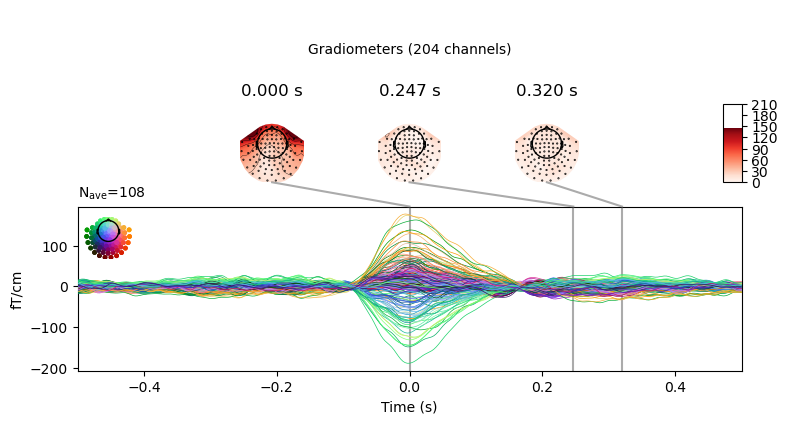

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();


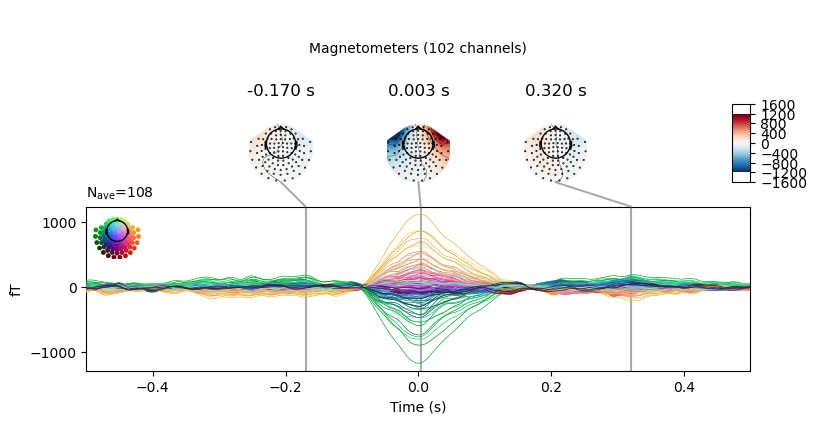

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/1530558415.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint();


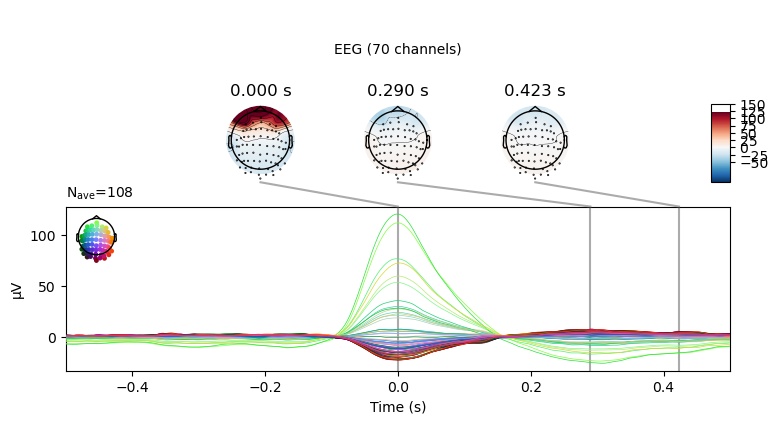

In [62]:
# There is a function to create EOG epochs:
eog_epochs = mne.preprocessing.create_eog_epochs(raw.copy().filter(1, None))
eog_epochs.average().plot_joint();

Let's see where those EOG segments show up in our raw data:

In [63]:
%matplotlib qt
raw.plot(events=eog_epochs.events);

Let's compute SSP projections based on the EOG:

In [64]:
projs_eog, _ = mne.preprocessing.compute_proj_eog(
    raw, n_mag=3, n_grad=3, n_eeg=3, average=True)

In [65]:
projs_eog  # let's check what they look like

[<Projection | EOG-planar--0.200-0.200-PCA-01, active : False, n_channels : 204, exp. var : 95.55%>,
 <Projection | EOG-planar--0.200-0.200-PCA-02, active : False, n_channels : 204, exp. var : 1.89%>,
 <Projection | EOG-planar--0.200-0.200-PCA-03, active : False, n_channels : 204, exp. var : 0.69%>,
 <Projection | EOG-axial--0.200-0.200-PCA-01, active : False, n_channels : 102, exp. var : 97.35%>,
 <Projection | EOG-axial--0.200-0.200-PCA-02, active : False, n_channels : 102, exp. var : 1.30%>,
 <Projection | EOG-axial--0.200-0.200-PCA-03, active : False, n_channels : 102, exp. var : 0.44%>,
 <Projection | EOG-eeg--0.200-0.200-PCA-01, active : False, n_channels : 70, exp. var : 99.67%>,
 <Projection | EOG-eeg--0.200-0.200-PCA-02, active : False, n_channels : 70, exp. var : 0.20%>,
 <Projection | EOG-eeg--0.200-0.200-PCA-03, active : False, n_channels : 70, exp. var : 0.05%>]

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/141627785.py:2: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_eog, info=epochs.info);
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/141627785.py:2: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_eog, info=epochs.info);
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/141627785.py:2: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_eog, info=epochs.info);
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/141627785.py:2: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_eog, info=epochs.info);


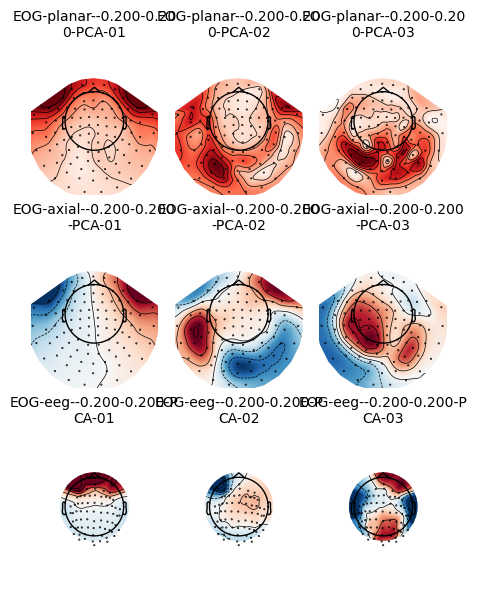

In [66]:
%matplotlib inline
mne.viz.plot_projs_topomap(projs_eog, info=epochs.info);

Now the important question is how many components one should keep? Tip: some of them don't look like clear artifact patterns. 

The good news is that we don't need to decide __*right*__ now - as you could see the projectors are stored with the data, but inactive at the moment.

BUT: let's repeat this procedure for the ECG, i.e. heart beat artifacts

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()


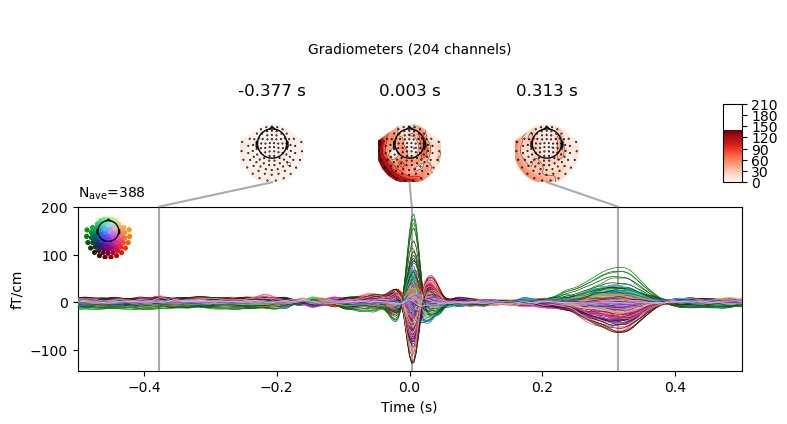

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()


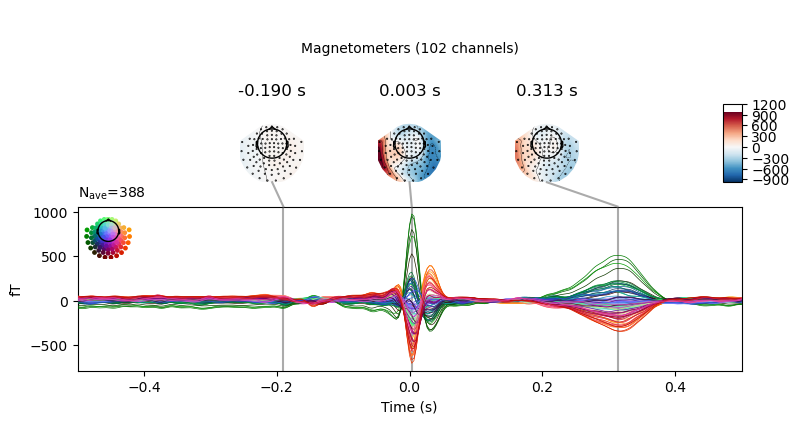

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/434745471.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint()


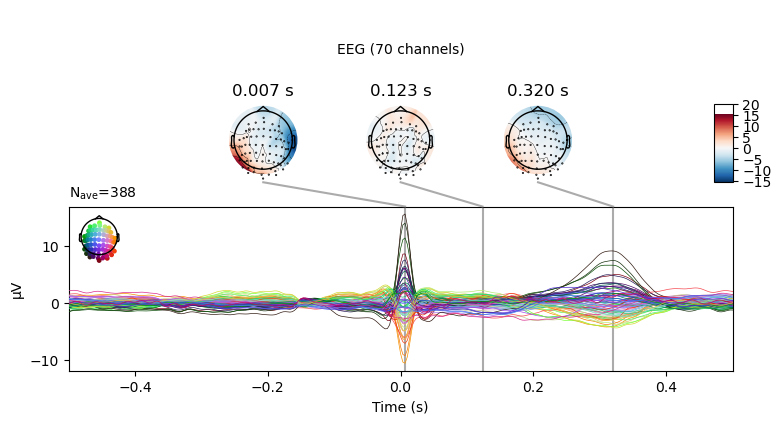

[<Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>]

In [67]:
# same business, same issue for ECG
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw.copy().filter(1, None))
ecg_epochs.average().plot_joint()

We can see that we also face contamination from the cardiac signal... we'll project that out as well.

/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/178739447.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_ecg, info=epochs.info);
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/178739447.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_ecg, info=epochs.info);
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/178739447.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_ecg, info=epochs.info);
/var/folders/5t/zzrvvsdd03721w2g_3y4w8xh0000gn/T/ipykernel_22212/178739447.py:3: RuntimeWarning: (X, Y) fit (3.1, 32.2) more than 20 mm from head frame origin
  mne.viz.plot_projs_topomap(projs_ecg, info=epochs.info);


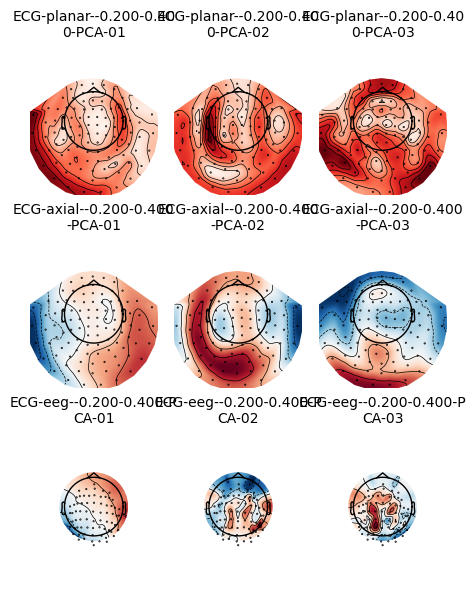

In [68]:
projs_ecg, _ = mne.preprocessing.compute_proj_ecg(
    raw, n_mag=3, n_grad=3, n_eeg=3, average=True)
mne.viz.plot_projs_topomap(projs_ecg, info=epochs.info);

## Apply projections and visualize effect

Now let's reverse our previous artifact rejection and apply the projections instead. 

In [69]:
# we remove the EOG from our rejection here:
reject_no_eog = dict(mag=reject['mag'], grad=reject['grad']) 

epochs_clean = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                          picks=picks, baseline=baseline,
                          preload=False,
                          reject=reject_no_eog)

# and then we add the EOG and ECG projs (but we don't apply them yet!)
epochs_clean.add_proj(projs_eog + projs_ecg)


Number of events,146
Events,face/famous/first: 25face/famous/immediate: 10face/famous/long: 14face/unfamiliar/first: 25face/unfamiliar/immediate: 12face/unfamiliar/long: 10scrambled/first: 25scrambled/immediate: 14scrambled/long: 11
Time range,-0.500 – 2.000 sec
Baseline,-0.200 – 0.000 sec


Let's look at one frontal MEG channel before applying the projections:

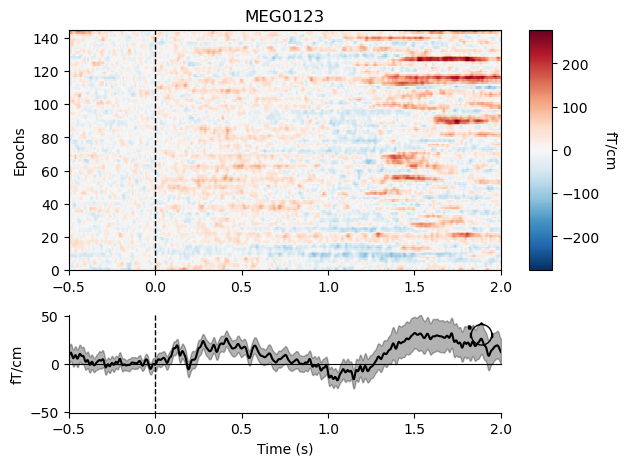

In [70]:
epochs_clean.plot_image(picks='MEG0123', sigma=1.);

Now let's apply the projections to a copy and plot this channel again!

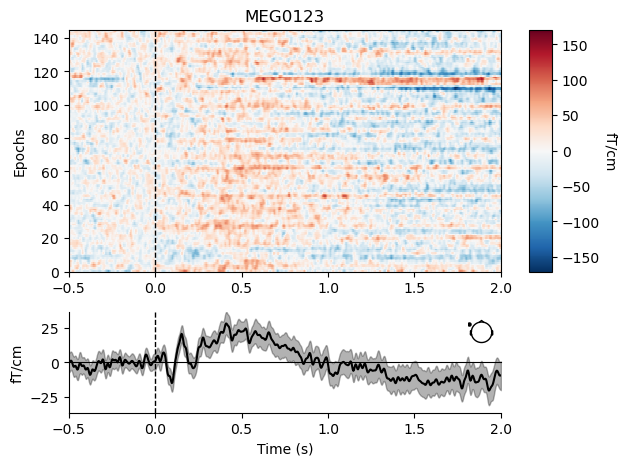

In [71]:
epochs_proj = epochs_clean.copy().apply_proj()  # apply projs on a copy

epochs_proj.plot_image(picks='MEG0123', sigma=1.);

We established earlier, that probably not all projections capture eye blinks and cardiac artifacts. So let's repeat this procedure but only project out the _first_ projection per channel type!

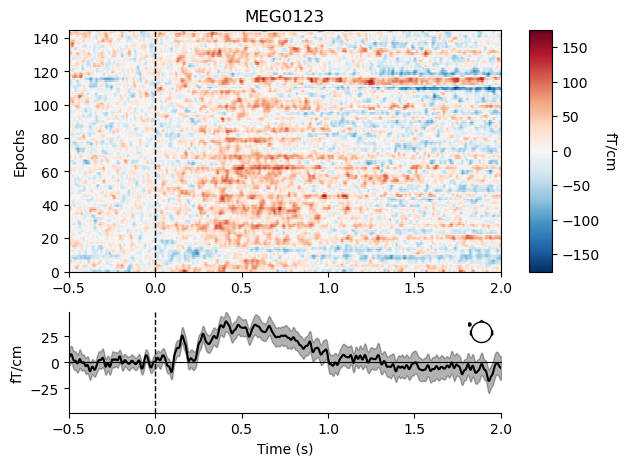

In [72]:
epochs_clean.del_proj()
epochs_clean.add_proj(projs_eog[::3] + projs_ecg[::3])  # only add some SSP projs
epochs_proj = epochs_clean.copy().apply_proj()  # apply projs on a copy

epochs_proj.plot_image(picks='MEG0123', sigma=1.);

In [73]:
epochs_proj.info

<Info | 25 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 70 EEG, 2 EOG
 custom_ref_applied: True
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 40.0 Hz
 meas_date: 1941-03-22 11:04:14 UTC
 meas_id: 4 items (dict)
 nchan: 378
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: dgw_studies
 projs: EOG-planar--0.200-0.200-PCA-01: on, EOG-axial-- ...
 sfreq: 300.0 Hz
 subject_info: 2 items (dict)
>

This way, we now keep all trials, but remove eye blinks and cardiac artifacts. We will now save the data with the SSP projections _unapplied_.

<div class="alert alert-info">
    <b>REMARK</b>:
     <ul>
    <li>MNE keeps SSP projections inside the info and allows to apply them later.</li>
    </ul>
</div>

#### Some thoughts on artifact rejection

We now tackled the artifacts in this data set by computing SSP projections. There are many other ways to do artifact rejection:

- mark artifacts by hand (visual inspection)
- use thresholds (which failed on this dataset!)
- use ICA
- use an automated pipeline, e.g. the <a href="https://autoreject.github.io/">autoreject project</a>
- ...

The best recommendation is: get to know your (raw) data!

## Save Epochs

In [74]:
# let's overwrite
epochs = epochs_clean

The standard way is to save the epochs as a `.fif` file together with all the header data. Epochs are saved with the suffix `-epo.fif`.

In [75]:
epochs_fname = raw_fname.replace('_meg.fif', '-epo.fif')  # create the file name
epochs_fname

'/Users/brittawe/Documents/teaching/practical_meeg_2022_data/ds000117/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-epo.fif'

In [76]:
epochs.save(epochs_fname, overwrite=True) 

## Bonus: Visualizing epochs data

See [this page](https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html) for options on how to visualize epochs.

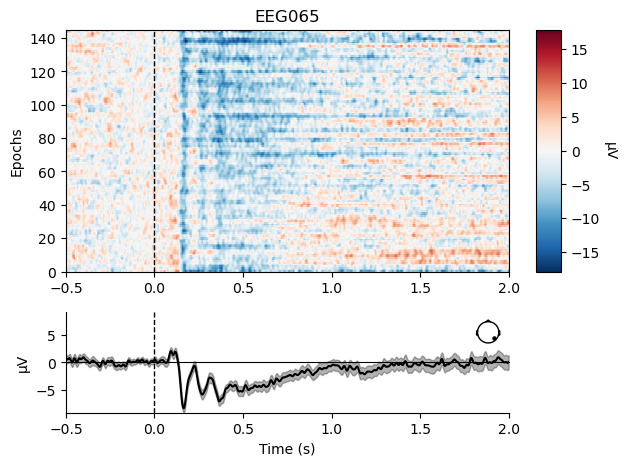

In [77]:
# We have already looked at the epochs in a stacked plot:

epochs_proj.plot_image(picks='EEG065', sigma=1.);

We can also look at the epochs in a data browser window:

In [78]:
%matplotlib qt
epochs.plot();

In [79]:
epochs.info

<Info | 25 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 70 EEG, 2 EOG
 custom_ref_applied: True
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 40.0 Hz
 meas_date: 1941-03-22 11:04:14 UTC
 meas_id: 4 items (dict)
 nchan: 378
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: dgw_studies
 projs: EOG-planar--0.200-0.200-PCA-01: off, EOG-axial-- ...
 sfreq: 300.0 Hz
 subject_info: 2 items (dict)
>